# Задание 2.1 - Нейронные сети

В этом задании вы реализуете и натренируете настоящую нейроную сеть своими руками!

В некотором смысле это будет расширением прошлого задания - нам нужно просто составить несколько линейных классификаторов вместе!

<img src="https://i.redd.it/n9fgba8b0qr01.png" alt="Stack_more_layers" width="400px"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_layer_gradient, check_layer_param_gradient, check_model_gradient
from layers import FullyConnectedLayer, ReLULayer
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD, MomentumSGD
from metrics import multiclass_accuracy

# Загружаем данные

И разделяем их на training и validation.

In [3]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0
    
    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    return train_flat, test_flat
    
train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)    
train_X, test_X = prepare_for_neural_network(train_X, test_X)
# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

# Как всегда, начинаем с кирпичиков

Мы будем реализовывать необходимые нам слои по очереди. Каждый слой должен реализовать:
- прямой проход (forward pass), который генерирует выход слоя по входу и запоминает необходимые данные
- обратный проход (backward pass), который получает градиент по выходу слоя и вычисляет градиент по входу и по параметрам

Начнем с ReLU, у которого параметров нет.

In [4]:
# TODO: Implement ReLULayer layer in layers.py
# Note: you'll need to copy implementation of the gradient_check function from the previous assignment

X = np.array([[1,-2,3],
              [-1, 2, 0.1]
              ])

assert check_layer_gradient(ReLULayer(), X)

Gradient check passed!


А теперь реализуем полносвязный слой (fully connected layer), у которого будет два массива параметров: W (weights) и B (bias).

Все параметры наши слои будут хранить через специальный класс `Param`, в котором будут храниться значения параметров и градиенты этих параметров, вычисляемые во время обратного прохода.

Это даст возможность аккумулировать (суммировать) градиенты из разных частей функции потерь, например, из cross-entropy loss и regularization loss.

In [5]:
np.mean([[1,2,4],[1,2,4]], axis=0)

array([1., 2., 4.])

In [6]:
# TODO: Implement FullyConnected layer forward and backward methods
assert check_layer_gradient(FullyConnectedLayer(3, 4), X)
# TODO: Implement storing gradients for W and B
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'W')
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'B')

Gradient check passed!
Gradient check passed!
Gradient check passed!


## Создаем нейронную сеть

Теперь мы реализуем простейшую нейронную сеть с двумя полносвязным слоями и нелинейностью ReLU. Реализуйте функцию `compute_loss_and_gradients`, она должна запустить прямой и обратный проход через оба слоя для вычисления градиентов.

In [7]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# TODO: In model.py, implement compute_loss_and_gradients function
model = TwoLayerNet(3, 3072, 10, reg = 0)
loss = model.compute_loss_and_gradients(train_X[:2], train_y[:2])

# TODO Now implement backward pass and aggregate all of the params
check_model_gradient(model, train_X[:2], train_y[:2])

Checking gradient for 0_W
Gradient check passed!
Checking gradient for 0_B
Gradient check passed!
Checking gradient for 2_W
Gradient check passed!
Checking gradient for 2_B
Gradient check passed!


True

Теперь добавьте к модели регуляризацию - она должна прибавляться к loss и делать свой вклад в градиенты.

In [9]:
# TODO Now implement l2 regularization in the forward and backward pass
model_with_reg = TwoLayerNet(3, 3072, 10, reg = 1e1)
loss_with_reg = model_with_reg.compute_loss_and_gradients(train_X[:2], train_y[:2])
assert loss_with_reg > loss and not np.isclose(loss_with_reg, loss), \
    "Loss with regularization (%2.4f) should be higher than without it (%2.4f)!" % (loss, loss_with_reg)

check_model_gradient(model_with_reg, train_X[:2], train_y[:2])

Checking gradient for 0_W
Gradient check passed!
Checking gradient for 0_B
Gradient check passed!
Checking gradient for 2_W
Gradient check passed!
Checking gradient for 2_B
Gradient check passed!


True

Также реализуем функцию предсказания (вычисления значения) модели на новых данных.

Какое значение точности мы ожидаем увидеть до начала тренировки?

In [10]:
import numpy as np

In [11]:
# Finally, implement predict function!

# TODO: Implement predict function
# What would be the value we expect?
multiclass_accuracy(model_with_reg.predict(train_X[:30]), train_y[:30]) 

0.1

# Допишем код для процесса тренировки

In [12]:
model = TwoLayerNet(100, 3072, 10, reg = 0.001)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-2)

# TODO Implement missing pieces in Trainer.fit function
# You should expect loss to go down and train and val accuracy go up for every epoch
loss_history, train_history, val_history = trainer.fit()

Loss: 2.219541, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.221784, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.276794, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.276934, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.264377, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.250204, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.171615, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.125317, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.300583, Train accuracy: 0.201222, val accuracy: 0.204000
Loss: 2.295184, Train accuracy: 0.230556, val accuracy: 0.228000
Loss: 1.988035, Train accuracy: 0.252667, val accuracy: 0.247000
Loss: 1.991691, Train accuracy: 0.273889, val accuracy: 0.262000
Loss: 2.088079, Train accuracy: 0.297111, val accuracy: 0.287000
Loss: 1.996838, Train accuracy: 0.311444, val accuracy: 0.305000
Loss: 1.932021, Train accuracy: 0.331667, val accuracy: 0.320000
Loss: 2.020292, Train acc

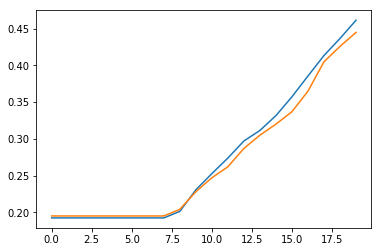

In [13]:
plt.plot(train_history)
plt.plot(val_history)

In [14]:
class Layer:
    def forward(self, x):
        result = ... # промежуточные вычисления
        self.x = x # сохраняем значения, которые нам
                   # понадобятся при обратном проходе
        return result
    
    def backward(self, grad):
        dx = ... # используем сохраненные значения, чтобы 
        dw = ... # вычислить градиент по x и по w
        self.w.grad += dw # аккумулируем градиент dw
        return dx

# Улучшаем процесс тренировки

Мы реализуем несколько ключевых оптимизаций, необходимых для тренировки современных нейросетей.

## Уменьшение скорости обучения (learning rate decay)

Одна из необходимых оптимизаций во время тренировки нейронных сетей - постепенное уменьшение скорости обучения по мере тренировки.

Один из стандартных методов - уменьшение скорости обучения (learning rate) каждые N эпох на коэффициент d (часто называемый decay). Значения N и d, как всегда, являются гиперпараметрами и должны подбираться на основе эффективности на проверочных данных (validation data). 

В нашем случае N будет равным 1.

In [15]:
# TODO Implement learning rate decay inside Trainer.fit method
# Decay should happen once per epoch

model = TwoLayerNet(100, 3072, 10, reg = 0.001)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate_decay=0.99, learning_rate=1e-2)

initial_learning_rate = trainer.learning_rate
loss_history, train_history, val_history = trainer.fit()

assert trainer.learning_rate < initial_learning_rate, "Learning rate should've been reduced"
assert trainer.learning_rate > 0.5*initial_learning_rate, "Learning rate shouldn'tve been reduced that much!"

Loss: 2.231626, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.243090, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.210401, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.277828, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.289473, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.306999, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.208309, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.253258, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 1.749870, Train accuracy: 0.192556, val accuracy: 0.196000
Loss: 2.433611, Train accuracy: 0.218556, val accuracy: 0.220000
Loss: 2.050872, Train accuracy: 0.240778, val accuracy: 0.234000
Loss: 2.244493, Train accuracy: 0.256000, val accuracy: 0.246000
Loss: 1.947075, Train accuracy: 0.270778, val accuracy: 0.262000
Loss: 2.211861, Train accuracy: 0.290889, val accuracy: 0.279000
Loss: 2.220966, Train accuracy: 0.315667, val accuracy: 0.298000
Loss: 1.524870, Train acc

# Накопление импульса (Momentum SGD)

Другой большой класс оптимизаций - использование более эффективных методов градиентного спуска. Мы реализуем один из них - накопление импульса (Momentum SGD).

Этот метод хранит скорость движения, использует градиент для ее изменения на каждом шаге, и изменяет веса пропорционально значению скорости.
(Физическая аналогия: Вместо скорости градиенты теперь будут задавать ускорение, но будет присутствовать сила трения.)

```
velocity = momentum * velocity - learning_rate * gradient 
w = w + velocity
```

`momentum` здесь коэффициент затухания, который тоже является гиперпараметром (к счастью, для него часто есть хорошее значение по умолчанию, типичный диапазон -- 0.8-0.99).

Несколько полезных ссылок, где метод разбирается более подробно:  
http://cs231n.github.io/neural-networks-3/#sgd  
https://distill.pub/2017/momentum/

In [16]:
# TODO: Implement MomentumSGD.update function in optim.py

model = TwoLayerNet(100, 3072, 10, reg = 1e-3)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-3, learning_rate_decay=0.99)

# You should see even better results than before!
loss_history, train_history, val_history = trainer.fit()

Loss: 2.290097, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.227121, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.284150, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.236791, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.234799, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.261199, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.258613, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.272947, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.150529, Train accuracy: 0.192444, val accuracy: 0.195000
Loss: 2.077868, Train accuracy: 0.216111, val accuracy: 0.222000
Loss: 2.079900, Train accuracy: 0.244111, val accuracy: 0.231000
Loss: 1.973166, Train accuracy: 0.261778, val accuracy: 0.252000
Loss: 1.950173, Train accuracy: 0.277000, val accuracy: 0.265000
Loss: 2.121865, Train accuracy: 0.299778, val accuracy: 0.289000
Loss: 2.169537, Train accuracy: 0.325333, val accuracy: 0.311000
Loss: 1.992317, Train acc

# Ну что, давайте уже тренировать сеть!

## Последний тест - переобучимся (overfit) на маленьком наборе данных

Хороший способ проверить, все ли реализовано корректно - переобучить сеть на маленьком наборе данных.  
Наша модель обладает достаточной мощностью, чтобы приблизить маленький набор данных идеально, поэтому мы ожидаем, что на нем мы быстро дойдем до 100% точности на тренировочном наборе. 

Если этого не происходит, то где-то была допущена ошибка!

In [17]:
data_size = 15
model = TwoLayerNet(100, 3072, 10, reg = 1e-1)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-1, num_epochs=150, batch_size=5)

# You should expect this to reach 1.0 training accuracy 
loss_history, train_history, val_history = trainer.fit()

Loss: 2.323707, Train accuracy: 0.200000, val accuracy: 0.000000
Loss: 2.297195, Train accuracy: 0.200000, val accuracy: 0.000000
Loss: 2.289104, Train accuracy: 0.200000, val accuracy: 0.000000
Loss: 2.320150, Train accuracy: 0.333333, val accuracy: 0.000000
Loss: 2.288615, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.247816, Train accuracy: 0.266667, val accuracy: 0.133333
Loss: 2.239063, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 2.334750, Train accuracy: 0.400000, val accuracy: 0.066667
Loss: 2.267164, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 2.303590, Train accuracy: 0.400000, val accuracy: 0.066667
Loss: 2.274573, Train accuracy: 0.400000, val accuracy: 0.066667
Loss: 2.211713, Train accuracy: 0.400000, val accuracy: 0.066667
Loss: 2.220136, Train accuracy: 0.400000, val accuracy: 0.066667
Loss: 2.137874, Train accuracy: 0.400000, val accuracy: 0.066667
Loss: 1.949351, Train accuracy: 0.466667, val accuracy: 0.066667
Loss: 2.086446, Train acc

Теперь найдем гипепараметры, для которых этот процесс сходится быстрее.
Если все реализовано корректно, то существуют параметры, при которых процесс сходится в **20** эпох или еще быстрее.
Найдите их!

In [18]:
# Now, tweak some hyper parameters and make it train to 1.0 accuracy in 20 epochs or less

model = TwoLayerNet(100, 3072, 10, reg = 1e-3)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
# TODO: Change any hyperparamers or optimizators to reach training accuracy in 20 epochs
trainer = Trainer(model, dataset, SGD(), learning_rate=0.3, num_epochs=20, batch_size=5)

loss_history, train_history, val_history = trainer.fit()

Loss: 2.316984, Train accuracy: 0.200000, val accuracy: 0.133333
Loss: 2.259623, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 2.319109, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 2.079399, Train accuracy: 0.400000, val accuracy: 0.066667
Loss: 1.909029, Train accuracy: 0.400000, val accuracy: 0.066667
Loss: 2.159986, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 2.122820, Train accuracy: 0.533333, val accuracy: 0.133333
Loss: 1.880067, Train accuracy: 0.400000, val accuracy: 0.066667
Loss: 1.671303, Train accuracy: 0.600000, val accuracy: 0.133333
Loss: 1.280370, Train accuracy: 0.666667, val accuracy: 0.066667
Loss: 1.361473, Train accuracy: 0.533333, val accuracy: 0.200000
Loss: 1.152975, Train accuracy: 0.666667, val accuracy: 0.133333
Loss: 1.528719, Train accuracy: 0.666667, val accuracy: 0.133333
Loss: 0.875900, Train accuracy: 0.866667, val accuracy: 0.133333
Loss: 1.155923, Train accuracy: 0.933333, val accuracy: 0.133333
Loss: 0.300519, Train acc

# Итак, основное мероприятие!

Натренируйте лучшую нейросеть! Можно добавлять и изменять параметры, менять количество нейронов в слоях сети и как угодно экспериментировать. 

Добейтесь точности лучше **40%** на validation set.

In [34]:
0.99**120

0.2993803913123313

In [36]:
# Let's train the best one-hidden-layer network we can

learning_rates = [1e-2]
reg_strengths = [1e-3]
learning_rate_decay = [0.99]
hidden_layer_sizes = [256]
num_epochs = [200]
batch_size = 64

best_classifier = None
best_val_accuracy = None

loss_history = []
train_history = []
val_history = []
best_learning_rate = 0
best_reg_strength = 0
best_hidden_layer_size = 0
best_num_epoch = 0

for learning_rate in learning_rates:
    for reg_strength in reg_strengths:
        for hidden_layer_size in hidden_layer_sizes:
            for num_epoch in num_epochs:
                model = TwoLayerNet(hidden_layer_size, 3072, 10, reg = reg_strength)
                dataset = Dataset(train_X, train_y, val_X, val_y)
                trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=learning_rate, num_epochs=num_epoch, batch_size=batch_size)

                loss_history, train_history, val_history = trainer.fit()
                
                if best_classifier == None:
                    best_classifier = model
                    best_val_accuracy = val_history[-1]
                
                if best_val_accuracy<best_val_accuracy:
                    best_classifier = model
                    best_val_accuracy = val_history[-1]
                    best_learning_rate = learning_rate
                    best_reg_strength = reg_strength
                    best_hidden_layer_size = hidden_layer_size
                    best_num_epoch = num_epoch
                print('next')

print('best validation accuracy achieved: %f' % best_val_accuracy)

Loss: 2.286667, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.310865, Train accuracy: 0.192333, val accuracy: 0.195000
Loss: 2.079054, Train accuracy: 0.202222, val accuracy: 0.207000
Loss: 2.136547, Train accuracy: 0.289556, val accuracy: 0.277000
Loss: 1.823366, Train accuracy: 0.358667, val accuracy: 0.347000
Loss: 1.674934, Train accuracy: 0.459778, val accuracy: 0.450000
Loss: 1.618854, Train accuracy: 0.509000, val accuracy: 0.488000
Loss: 1.709639, Train accuracy: 0.571222, val accuracy: 0.545000
Loss: 1.442462, Train accuracy: 0.608333, val accuracy: 0.565000
Loss: 1.300043, Train accuracy: 0.629556, val accuracy: 0.584000
Loss: 1.426998, Train accuracy: 0.679556, val accuracy: 0.627000
Loss: 1.294500, Train accuracy: 0.690889, val accuracy: 0.638000
Loss: 1.150672, Train accuracy: 0.696000, val accuracy: 0.645000
Loss: 1.262987, Train accuracy: 0.707222, val accuracy: 0.659000
Loss: 1.529742, Train accuracy: 0.718778, val accuracy: 0.671000
Loss: 0.967223, Train acc

In [37]:
best_learning_rate,                     best_reg_strength

(0, 0)

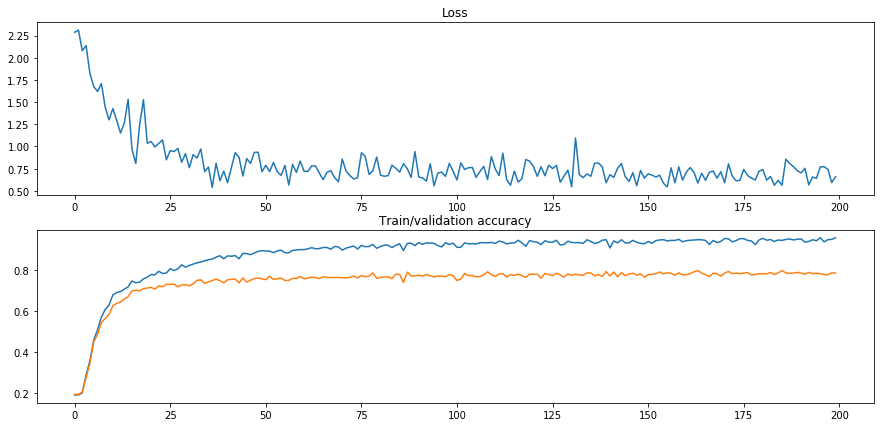

In [38]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.title("Loss")
plt.plot(loss_history)
plt.subplot(212)
plt.title("Train/validation accuracy")
plt.plot(train_history)
plt.plot(val_history)

# Как обычно, посмотрим, как наша лучшая модель работает на тестовых данных

In [39]:
test_pred = best_classifier.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)
print('Neural net test set accuracy: %f' % (test_accuracy, ))

Neural net test set accuracy: 0.736000
